<img src="Images/logo.jpg" width="600">

## Exercitation_05 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from scipy import constants
from mpl_toolkits.mplot3d import Axes3D

First of all, I implemented the wavefunctions, with functions which take in input a file with the $x,y,z$ coordinates and give in output $|\psi(x,y,z)|^2$.  
Then, I implemented the Metropolis algorithm, as a function with arguments:
- the distribution I want to sample;
- the initial position $(x_0,y_0,z_0)$;
- the number of steps $n_{st}$ to do;
- the number of initial steps I don't use to sample but that I use to reach a "good position";
- a string with the indication of the probability of transition (in this case I used *Unif* which extracts a random number in [-step, step] and *Gauss* for a random normal number centred in $0$ and of width *'step'*);
- the lenght of the step;
- the string with the output file in Cartesian coordinates.  

Finally, I used a function `Radii` to calculate the distance of a point from the origin.  

The algorithm moves a step in the $(x,y,z)$ directions with the probability of transitions chosen and evalues the function in the new point. Then it calculates the ratio with the value of the function in the old point and choose to accept and move or to reject and count the old point position again.  


I simulated starting from $\{1.,1.,1.\}$ in $a_0$ units, with $10^6$ steps, excluding the first $1000$ steps, with *Unif* acceptance distribution and with step$=1.5$ for $\psi_{100}$ and step$=3.3$ for $\psi_{210}$, calibrated with some attemps in order to have a percentage of acceptance between $40\%$ and $50\%$. I used 100 blocks to evalue the uncertainties.  
I choose this starting point because it is near to the origin, and I didn't choose the origin because I got a $0\%$ acceptance percentage of accepted points for $\psi_{210}$ and the chain didn't move from this point. 

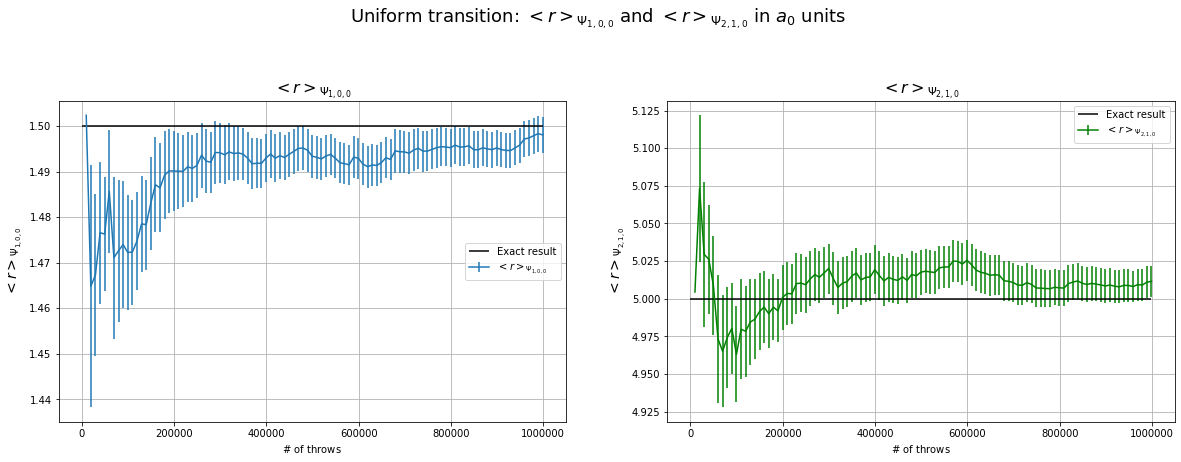

In [6]:
plt.figure(figsize=(20,13))
plt.suptitle('Uniform transition: $< r >_{\Psi_{1,0,0}}$ and $< r >_{\Psi_{2,1,0}}$ in $a_0$ units ', fontsize = 18)

plt.subplot(221)
plt.title('$< r >_{\Psi_{1,0,0}}$', fontsize = 16)
data100u= ascii.read('P1/Risultati/r100.uniform', format='no_header')
x = data100u['col1'] 
r = data100u['col2'] #vector with mean
err_ru = data100u['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_ru , label= '$< r >_{\Psi_{1,0,0}}$' )
plt.hlines(1.5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$', fontsize= 14)
plt.legend(loc = 5)

plt.subplot(222)
plt.title('$< r >_{\Psi_{2,1,0}}$', fontsize = 16)
data210u= ascii.read('P1/Risultati/r210.uniform',format='no_header')
x = data210u['col1'] 
r = data210u['col2'] #vector with mean
err_ru2 = data210u['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_ru2 , label= '$< r >_{\Psi_{2,1,0}}$', color = 'green' )
plt.hlines(5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$', fontsize= 14)
plt.legend(loc = 1)
plt.show()

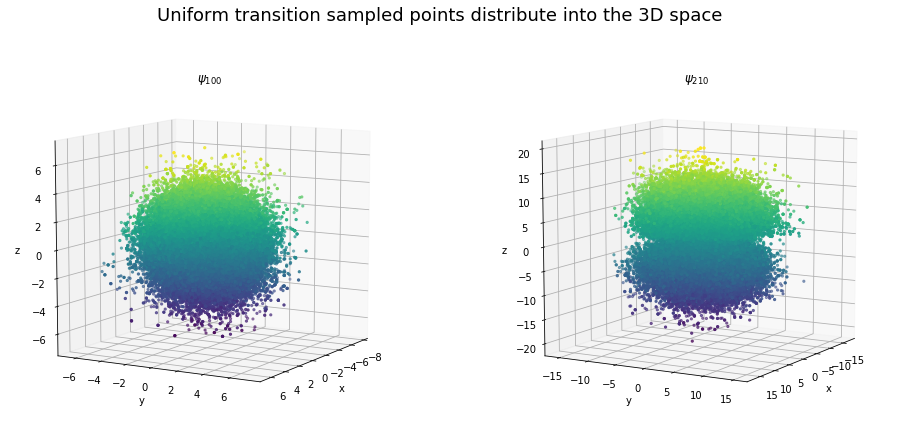

In [7]:
fig = plt.figure(figsize=(16,7))
plt.suptitle('Uniform transition sampled points distribute into the 3D space', fontsize = 18)

punti100u= ascii.read('P1/Risultati/psi_100.uniform')
X = punti100u['x']
Y = punti100u['y']
Z = punti100u['z']
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('$\psi_{100}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

punti210u= ascii.read('P1/Risultati/psi_210.uniform')
X = punti210u['x']
Y = punti210u['y']
Z = punti210u['z']
#===============
# Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('$\psi_{210}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

In order to explore the importance of starting from "a good point", I tried to perform a simulation starting from $(x_0, y_0, z_0) = (10, 10, 10)$ and without the ignored initial steps.  
These results are in the folder `Risultati_far`. Here I report the data for the *Uniform* transition. 

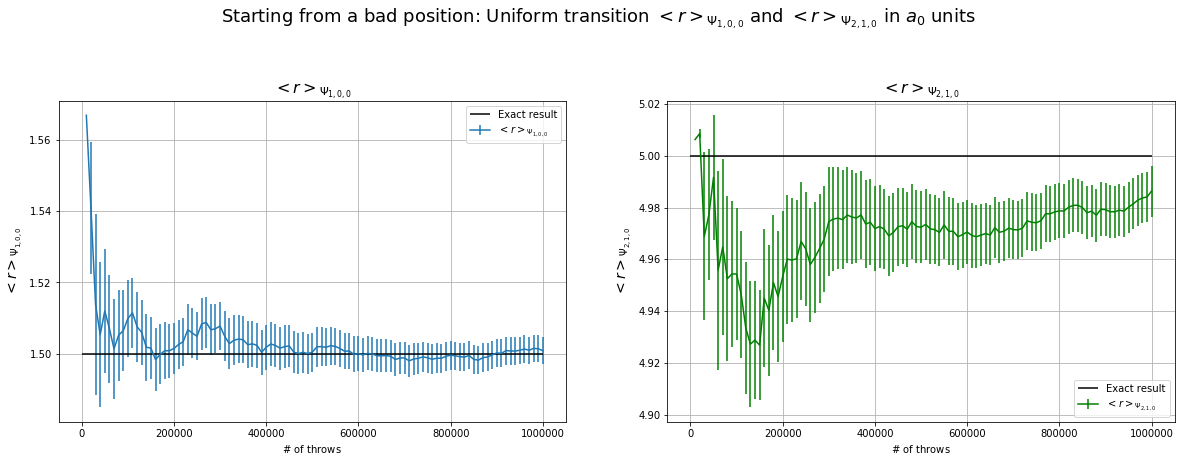

In [17]:
plt.figure(figsize=(20,13))
plt.suptitle('Starting from a bad position: Uniform transition $< r >_{\Psi_{1,0,0}}$ and $< r >_{\Psi_{2,1,0}}$ in $a_0$ units ', fontsize = 18)

plt.subplot(221)
plt.title('$< r >_{\Psi_{1,0,0}}$', fontsize = 16)
data= ascii.read('P1/Risultati_far/r100b.uniform', format='no_header')
x = data['col1'] 
r = data['col2'] #vector with mean
err_r = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_r , label= '$< r >_{\Psi_{1,0,0}}$' )
plt.hlines(1.5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$', fontsize= 14)
plt.legend()

plt.subplot(222)
plt.title('$< r >_{\Psi_{2,1,0}}$', fontsize = 16)
data= ascii.read('P1/Risultati_far/r210b.uniform', format='no_header')
x = data['col1'] 
r = data['col2'] #vector with mean
err_r = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_r , label= '$< r >_{\Psi_{2,1,0}}$', color = 'green' )
plt.hlines(5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$', fontsize= 14)
plt.legend(loc=4)
plt.show()

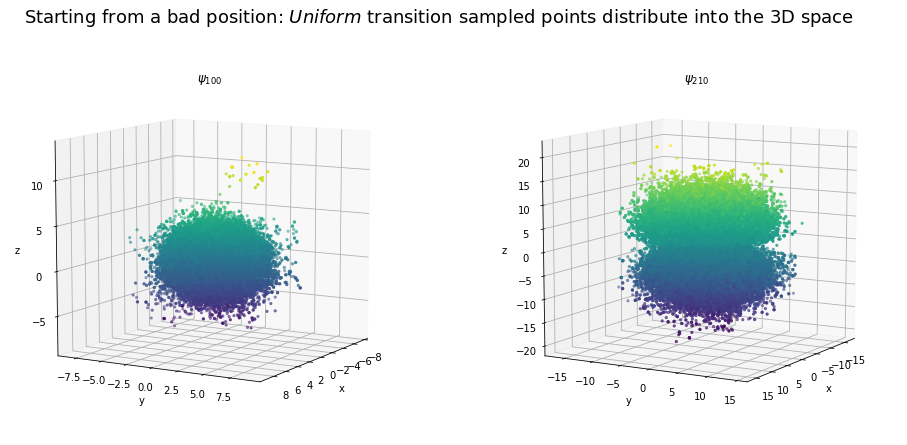

In [18]:
fig = plt.figure(figsize=(16,7))
plt.suptitle('Starting from a bad position: $Uniform$ transition sampled points distribute into the 3D space', fontsize = 18)

punti100u= ascii.read('P1/Risultati_far/psi_100b.uniform')
X = punti100u['x']
Y = punti100u['y']
Z = punti100u['z']
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('$\psi_{100}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)


punti210u= ascii.read('P1/Risultati_far/psi_210b.uniform')
X = punti210u['x']
Y = punti210u['y']
Z = punti210u['z']
#===============
# Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('$\psi_{210}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

I can see there is much scatter and there are a few points separated from the cloud, but finally the results are still good. It can mean that the algorithm quickly reaches the cloud region.  

To verify it, I perform an extreme situation: I started very far, from $\{100., 100.,100.\}$ in $a_0$ units, and I tried to consider every point or rejecting the first $1000$ steps:

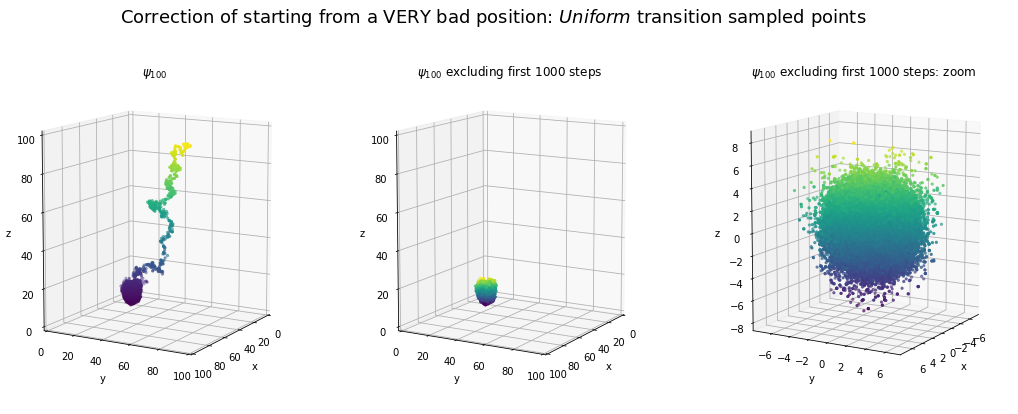

In [19]:
fig = plt.figure(figsize=(18,6.5))
plt.suptitle('Correction of starting from a VERY bad position: $Uniform$ transition sampled points', fontsize = 18)
punti100u= ascii.read('P1/Risultati_far/psi_100vb.uniform')

X = punti100u['x']
Y = punti100u['y']
Z = punti100u['z']
ax = fig.add_subplot(1, 3, 1, projection='3d')  #  First subplot
ax.set_title('$\psi_{100}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlim(0.,100.)
ax.set_ylim(0.,100.)
ax.set_zlim(0.,100.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

punti100c= ascii.read('P1/Risultati_far/psi_100vbc.uniform')
X = punti100c['x']
Y = punti100c['y']
Z = punti100c['z']
ax = fig.add_subplot(1, 3, 2, projection='3d')          # Second subplot
ax.set_title('$\psi_{100}$ excluding first 1000 steps')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlim(0.,100.)
ax.set_ylim(0.,100.)
ax.set_zlim(0.,100.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

ax = fig.add_subplot(1, 3, 3, projection='3d')            #  Third subplot
ax.set_title('$\psi_{100}$ excluding first 1000 steps: zoom')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

In the plot on the left, all the points are considered. Using the first $1000$ points to equilibrate the system, we see it reaches quickly the region I want to sample (it takes $\sim 500$ steps to reach a distance of about $2a_0$ from the origin) and in the third plot I show the second plot rescaled to appreciate the accuracy.

Finally evalued $< r >_{\Psi_{1,0,0}}$ and $< r >_{\Psi_{2,1,0}}$ with a *Gaussian* transition, and again I started simulating from $\{1.,1.,1.\}$ in $a_0$ units, with $10^6$ steps, excluding the first $1000$ steps and with step$=0.8$ for $\psi_{100}$ and step$=2.2$ for $\psi_{210}$, calibrated with some attemps in order to have a percentage of acceptance between $40\%$ and $50\%$. I used 100 blocks to evalue the uncertainties.  

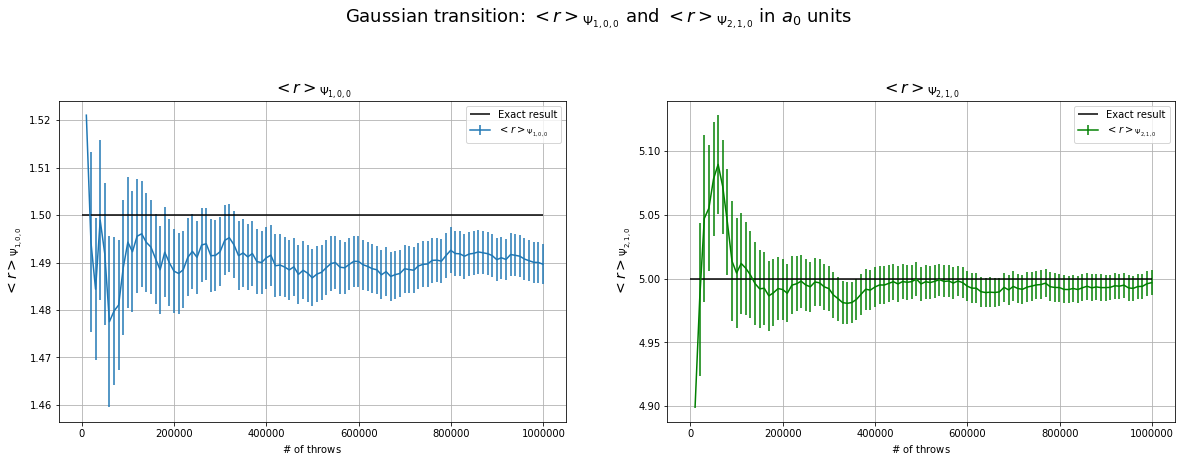

In [20]:
plt.figure(figsize=(20,13))
plt.suptitle('Gaussian transition: $< r >_{\Psi_{1,0,0}}$ and $< r >_{\Psi_{2,1,0}}$ in $a_0$ units ', fontsize = 18)

plt.subplot(221)
plt.title('$< r >_{\Psi_{1,0,0}}$', fontsize = 16)
data100g= ascii.read('P1/Risultati/r100.norm', format='no_header')
x = data100g['col1'] 
r = data100g['col2'] #vector with mean
err_rg = data100g['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_rg , label= '$< r >_{\Psi_{1,0,0}}$' )
plt.hlines(1.5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$', fontsize= 14)
plt.legend()

plt.subplot(222)
plt.title('$< r >_{\Psi_{2,1,0}}$', fontsize = 16)
data210g= ascii.read('P1/Risultati/r210.norm',format='no_header')
x = data210g['col1'] 
r = data210g['col2'] #vector with mean
err_rg2 = data210g['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, r, err_rg2 , label= '$< r >_{\Psi_{2,1,0}}$', color = 'green' )
plt.hlines(5, 0, max(x), label = 'Exact result')
plt.xlabel('$\#$ of throws')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$', fontsize= 14)
plt.legend()
plt.show()

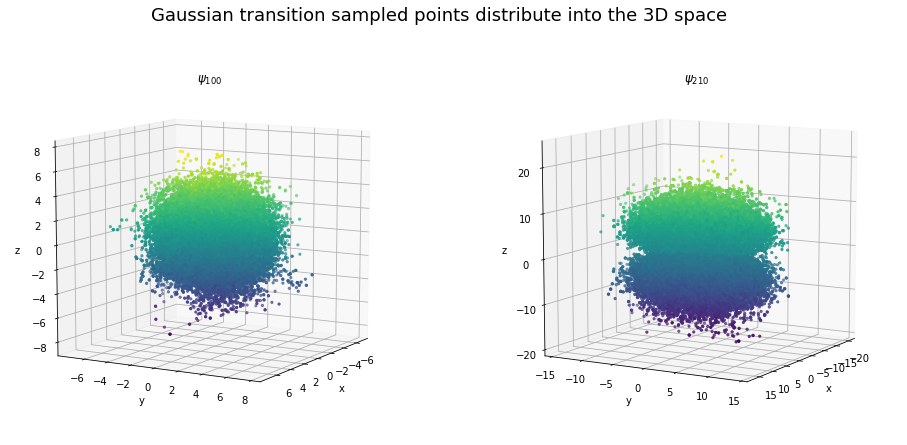

In [22]:
fig = plt.figure(figsize=(16,7))
plt.suptitle('Gaussian transition sampled points distribute into the 3D space', fontsize = 18)

punti100u= ascii.read('P1/Risultati/psi_100.norm')
X = punti100u['x']
Y = punti100u['y']
Z = punti100u['z']
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('$\psi_{100}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)


punti210u= ascii.read('P1/Risultati/psi_210.norm')
X = punti210u['x']
Y = punti210u['y']
Z = punti210u['z']

#===============
# Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('$\psi_{210}$')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

We can compare the errors and the sampled points distributions to quantify a difference using these different transitions.  

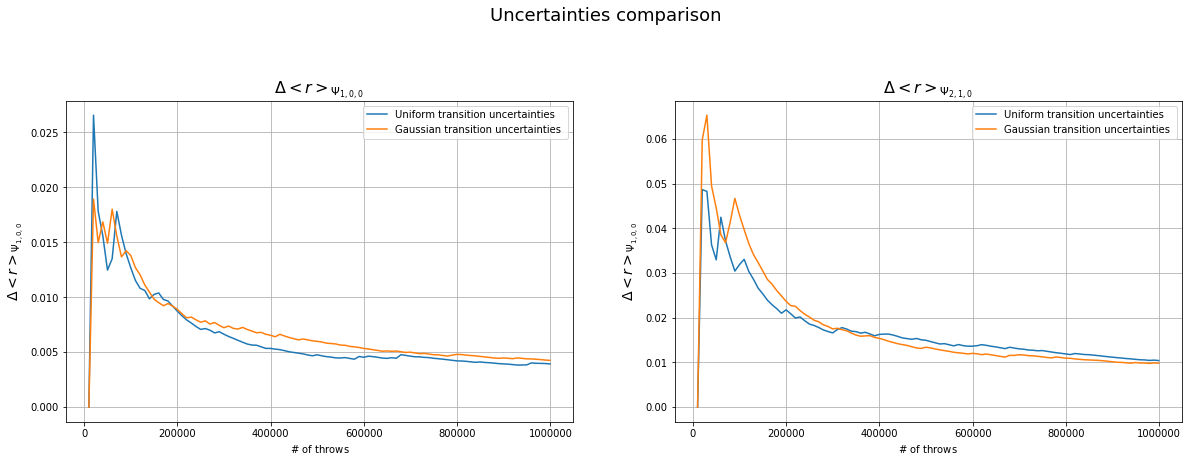

In [37]:


plt.figure(figsize=(20,13))
plt.suptitle('Uncertainties comparison', fontsize = 18)

plt.subplot(221)
plt.title('$\Delta<  r >_{\Psi_{1,0,0}}$', fontsize = 16)
plt.grid(True)
plt.plot(x, err_ru, label = 'Uniform transition uncertainties ')
plt.plot(x, err_rg, label = 'Gaussian transition uncertainties ')
plt.xlabel('$\#$ of throws')
plt.ylabel('$\Delta < r >_{\Psi_{1,0,0}}$', fontsize= 14)
plt.legend()

plt.subplot(222)
plt.title('$\Delta<  r >_{\Psi_{2,1,0}}$', fontsize = 16)
plt.grid(True)
plt.plot(x, err_ru2, label = 'Uniform transition uncertainties ')
plt.plot(x, err_rg2, label = 'Gaussian transition uncertainties ')
plt.xlabel('$\#$ of throws')
plt.ylabel('$\Delta < r >_{\Psi_{1,0,0}}$', fontsize= 14)
plt.legend()
plt.show()

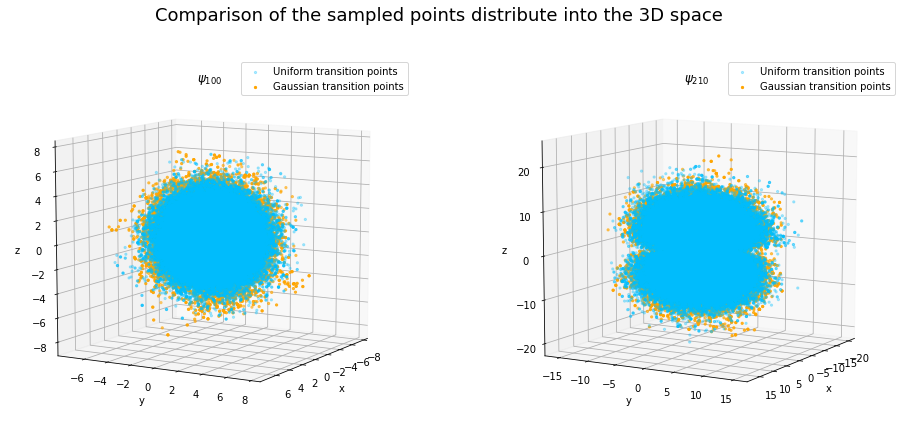

In [25]:
fig = plt.figure(figsize=(16,7))
plt.suptitle('Comparison of the sampled points distribute into the 3D space', fontsize = 18)

punti100u= ascii.read('P1/Risultati/psi_100.uniform')
X = punti100u['x']
Y = punti100u['y']
Z = punti100u['z']
punti100g= ascii.read('P1/Risultati/psi_100.norm')
X1 = punti100g['x']
Y1 = punti100g['y']
Z1 = punti100g['z']
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('$\psi_{100}$')
ax.scatter(X, Y, Z, marker='.', color = 'deepskyblue', alpha = 0.3, label='Uniform transition points')
ax.scatter(X1, Y1, Z1, marker='.', color = 'orange', label='Gaussian transition points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.legend()

punti210u= ascii.read('P1/Risultati/psi_210.uniform')
X = punti210u['x']
Y = punti210u['y']
Z = punti210u['z']
punti210g= ascii.read('P1/Risultati/psi_210.norm')
X1 = punti210g['x']
Y1 = punti210g['y']
Z1 = punti210g['z']
#===============
# Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('$\psi_{210}$')
ax.scatter(X, Y, Z, marker='.', color = 'deepskyblue', alpha = 0.3, label='Uniform transition points')
ax.scatter(X1, Y1, Z1, marker='.', color = 'orange', label='Gaussian transition points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.legend()

plt.show()

We can confirm there is no evident difference with these two different transitions. The only remarkable difference is that in order to obtain the same acceptance percentage, I had to do shorter steps with the *Gaussian* mode.